### FINAL PROJECT | Dataset: "Tips"


*Project List*:

Goal: You will analyze the “Tips” data frame so start with loading that in. Use the fig, axes method to create combine visualizations for both categorical and quantitative variables. Using the single-cell block of code, you’ve worked with for classification comparisons, determine which classification method is optimal for classifying individuals based on whether they are male or female – utilizing all data available and usable.

#### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



import warnings
warnings.filterwarnings("ignore")

#### Load the dataset "tips"

In [2]:
df_tips=sns.load_dataset("tips")

#### EDA

In [3]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


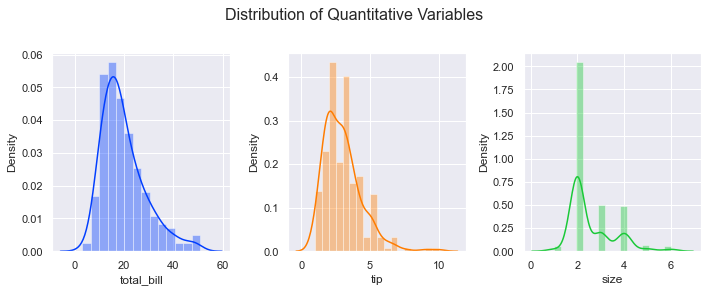

In [7]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig,axes = plt.subplots(1,3, figsize = (10,4))

sns.distplot(df_tips["total_bill"], color = colors[0], ax = axes[0])
sns.distplot(df_tips["tip"], color = colors[1], ax = axes[1])
sns.distplot(df_tips["size"], color = colors[2], ax = axes[2])

plt.suptitle("Distribution of Quantitative Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

In [8]:
df_tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

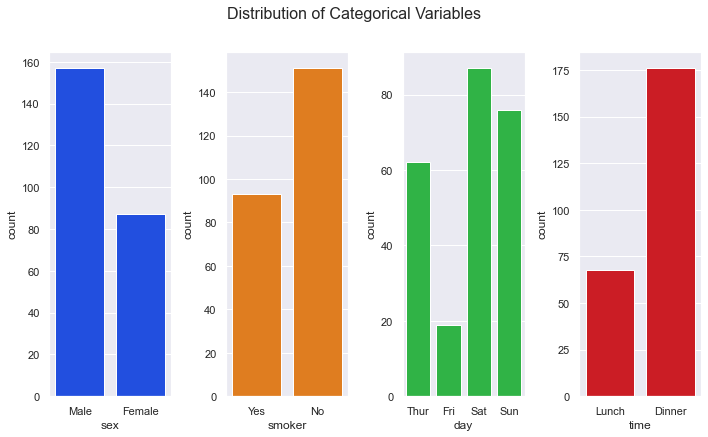

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(1, 4, figsize=(10, 6))

sns.countplot(data=df_tips, x="sex", color=colors[0], ax=axes[0])
sns.countplot(data=df_tips, x="smoker", color=colors[1], ax=axes[1])
sns.countplot(data=df_tips, x="day", color=colors[2], ax=axes[2])
sns.countplot(data=df_tips, x="time", color=colors[3], ax=axes[3])

plt.suptitle("Distribution of Categorical Variables", y=1.01, size=16)
plt.tight_layout()
plt.show()

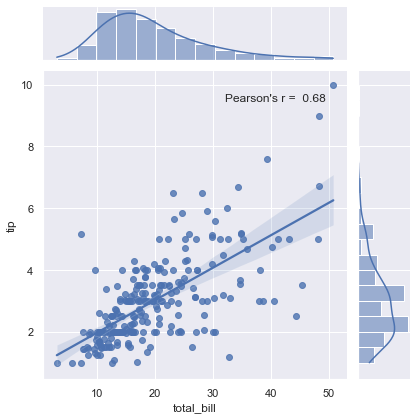

In [13]:
sns.jointplot(x="total_bill", y="tip", data=df_tips, kind="reg")
plt.annotate(f"Pearson's r = {stats.pearsonr(df_tips['total_bill'], df_tips['tip'])[0]: .2f}",
             xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)
plt.show()

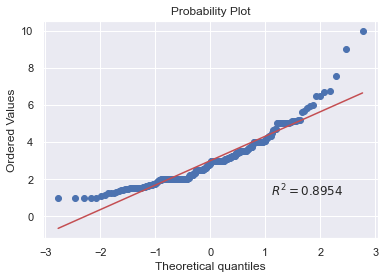

In [14]:
stats.probplot(df_tips["tip"], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

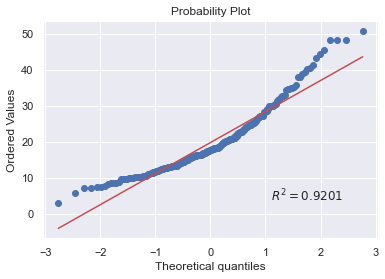

In [15]:
stats.probplot(df_tips["total_bill"], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

Total bill, higher R squared!

In [20]:
df_tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [21]:
quan_pred = df_tips.copy()

quan_pred = quan_pred.drop(columns = ["smoker","day","time"])

In [22]:
quan_pred = pd.get_dummies(quan_pred)

In [23]:
quan_pred.head()

,total_bill,tip,size,sex_Male,sex_Female
0,16.99,1.01,2,False,True
1,10.34,1.66,3,True,False
2,21.01,3.50,3,True,False
3,23.68,3.31,2,True,False
4,24.59,3.61,4,False,True


In [24]:
train_df, test_df = train_test_split(quan_pred, test_size=0.3, random_state=32)

In [25]:
Y_test = test_df["tip"]

X_test = test_df.drop(columns= ["tip"], axis = 1)

Y_train = train_df["tip"]

X_train = train_df.drop(columns= ["tip"], axis = 1)

In [26]:
features = X_train.copy()
targets = Y_train.copy()

models = [
          LinearRegression(),
          RidgeCV(),
          LassoCV(),
          ElasticNetCV(),
          RandomForestRegressor()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, targets, scoring='r2', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'r2'])

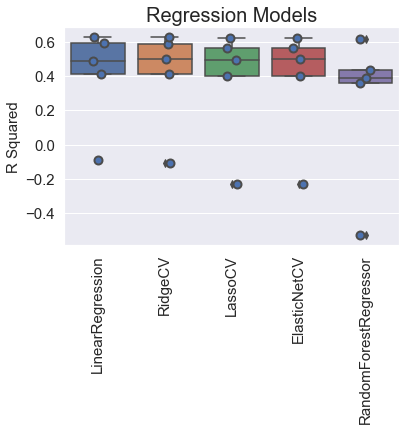

In [27]:
#visualizing the results
sns.boxplot(x='model_name', y='r2', data=cv_df)
sns.stripplot(x='model_name', y='r2', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Regression Models', fontsize=20)
plt.ylabel('R Squared', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [28]:
#looking at average r squared
final_comp = cv_df.groupby('model_name').r2.mean().reset_index().sort_values(by = "r2", ascending = False)
final_comp

,model_name,r2
2,LinearRegression,0.404409
4,RidgeCV,0.403860
0,ElasticNetCV,0.370657
1,LassoCV,0.369677
3,RandomForestRegressor,0.252988


all pretty bad!!!! why???...tips are inconsistent!

In [29]:
cat_pred = df_tips.copy()

cat_pred = cat_pred.drop(columns = ["smoker","day"])

In [30]:
extra = pd.get_dummies(cat_pred["sex"])

cat_pred = cat_pred.drop(columns = "sex")

df_final = pd.concat([cat_pred, extra], axis = 1)

In [31]:
df_final.head()

,total_bill,tip,time,size,Male,Female
0,16.99,1.01,Dinner,2,False,True
1,10.34,1.66,Dinner,3,True,False
2,21.01,3.50,Dinner,3,True,False
3,23.68,3.31,Dinner,2,True,False
4,24.59,3.61,Dinner,4,False,True


In [32]:
train_df, test_df = train_test_split(df_final, test_size=0.3, random_state=32)

In [33]:
Y_test = test_df["time"]

X_test = test_df.drop(columns= ["time"], axis = 1)

Y_train = train_df["time"]

X_train = train_df.drop(columns= ["time"], axis = 1)

In [34]:
features = X_train.copy()
targets = Y_train.copy()

models = [
          MultinomialNB(),
          LogisticRegression(multi_class='multinomial',max_iter = 10000),
          KNeighborsClassifier(),
          SVC(),
          RandomForestClassifier()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, targets, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

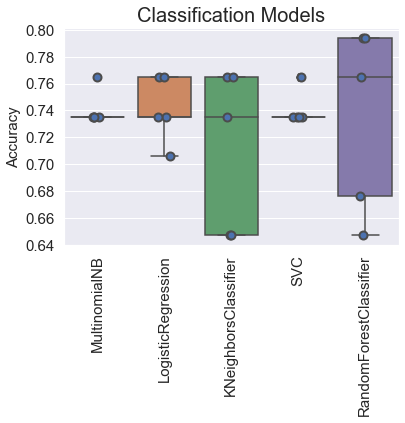

In [35]:
#visualizing the results
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classification Models', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [36]:
#looking at average r squared
final_comp = cv_df.groupby('model_name').accuracy.mean().reset_index().sort_values(by = "accuracy", ascending = False)
final_comp

,model_name,accuracy
1,LogisticRegression,0.741176
2,MultinomialNB,0.741176
4,SVC,0.741176
3,RandomForestClassifier,0.735294
0,KNeighborsClassifier,0.711765


Any one of top 2, perhaps comment on variability shown in graph!